# Arithmetic Operations on Images

### Saurav Mishra


    Arithmetic Operations like Addition, Subtraction, and Bitwise Operations(AND, OR, NOT, XOR) can be applied to the 
    input images. These operations can be helpful in enhancing the properties of the input images. The Image arithmetics 
    are important for analyzing the input image properties and extracting useful features from the image. 
    
   **Ref -**
   
   1. https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html
   2. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html
    
    
    
## 1. Image Addition: (Linear Blend)

    Two images can be added using the OpenCV functions - cv2.add() or simply by numpy operation, res = img1 + img2. 
    Both images should be of same depth and type, or second image can just be a scalar value.
    
    cv2.add() - The add method directly adds up image pixels in the two images.
                Syntax: cv2.add(img1, img2)

    
    ** Both images should be of equal size and depth.


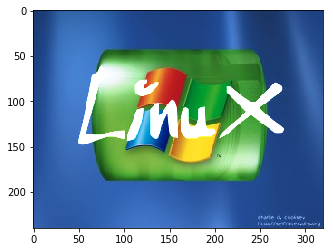

In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv.imread('./Data/LinuxLogo.jpg')
img2 = cv.imread('./Data/WindowsLogo.jpg')

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # This is required as OpenCV reads the color channels as BGR where as 
                                             # matplotlib reads the channels as RGB.

if img1 is None:
    print("Error loading Image 1")
    exit(-1)
elif img2 is None:
    print("Error loading Image 2")
    exit(-1)
    
dst = cv2.add(img1, img2)

plt.imshow(dst)

## 2. Image Blending:

    This is also image addition, but different weights are given to images so that it gives a feeling of blending 
    or transparency. Images are added as per the equation below:

    g(x) = (1 - alpha)f0(x) + alpha f1(x)

    **By varying alpha from 0 --> 1, a transition effect between images can be formed.
    
    OpenCV provides the addWeighted() method to give a blending/transparency effect on adding two images.
    
    cv2.addWeighted() applies following equation on the image -
    dst = alpha * img1 + beta * img2 + gamma

    Here beta is taken as (1 - alpha) and gamma is taken as zero.
    
    Syntax: cv2.addWeighted(img1, wt1, img2, wt2, gammaValue)

    Parameters:
    img1         : First Input Image array(Single-channel, 8-bit or floating-point)
    wt1          : Weight of the first input image elements to be applied to the final image (ALPHA)
    img2         : Second Input Image array(Single-channel, 8-bit or floating-point)
    wt2          : Weight of the second input image elements to be applied to the final image (BETA)
    gammaValue   : Measurement of light. The gamma value is added to all pixel values. To maintain the 
                   normal image light conditions gamma is maintained as zero.
    
    ** Both images should be of equal size and depth.

Enter alpha [0.0-1.0]: 
0.4


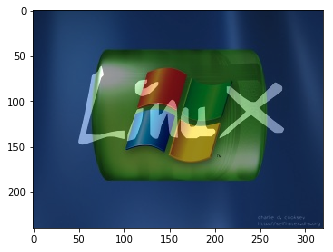

In [18]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

print('Enter alpha [0.0-1.0]: ''')
alpha = float(input().strip())

img1 = cv.imread('./Data/LinuxLogo.jpg')
img2 = cv.imread('./Data/WindowsLogo.jpg')

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # This is required as OpenCV reads the color channels as BGR where as 
                                             # matplotlib reads the channels as RGB.

if img1 is None:
    print("Error loading Image 1")
    exit(-1)
elif img2 is None:
    print("Error loading Image 2")
    exit(-1)
    
# blend_images
beta = (1.0 - alpha)
blended_img = cv2.addWeighted(img1, alpha, img2, beta, 0.0)

plt.imshow(blended_img)

### Now lets observe the effect of gamma value. We will vary the gamma value and check how it aftects the lighting conditions while blending images together - 

    - We will keep the alpha value constat now.

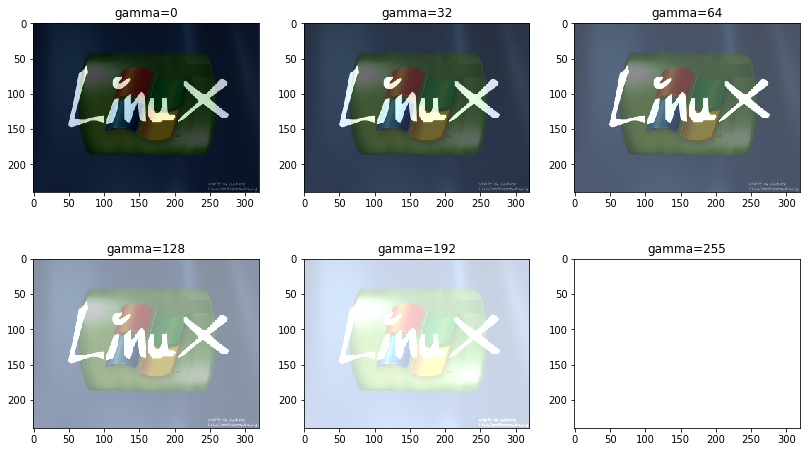

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv.imread('./Data/LinuxLogo.jpg')
img2 = cv.imread('./Data/WindowsLogo.jpg')

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # This is required as OpenCV reads the color channels as BGR where as 
                                             # matplotlib reads the channels as RGB.

if img1 is None:
    print("Error loading Image 1")
    exit(-1)
elif img2 is None:
    print("Error loading Image 2")
    exit(-1)

fig, ax = plt.subplots(2,3)
    
blended_img1 = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)
blended_img2 = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=32)
blended_img3 = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=64)
blended_img4 = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=128)
blended_img5 = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=192)
blended_img6 = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=255)

ax[0,0].imshow(blended_img1, cmap='gray')
ax[0,0].set_title("gamma=0")

ax[0,1].imshow(blended_img2, cmap='gray')
ax[0,1].set_title("gamma=32")

ax[0,2].imshow(blended_img3, cmap='gray')
ax[0,2].set_title("gamma=64")

ax[1,0].imshow(blended_img4, cmap='gray')
ax[1,0].set_title("gamma=128")

ax[1,1].imshow(blended_img5, cmap='gray')
ax[1,1].set_title("gamma=192")

ax[1,2].imshow(blended_img6, cmap='gray')
ax[1,2].set_title("gamma=255")

# adjust the spacing between the sub plots for a clear view.
plt.subplots_adjust(right=1.9, bottom=0, top=1.5)

plt.show()

#### As we see in the plots above increasing the value of gamma affects the light conditions in the blended image. gamma=255 allows all light to pass through the image making it very bright.


## 3. Bitwise Operations on Images

    Bitwise operations include the bitwise - AND, OR, XOR and NOT operations on the images. These operations are often used 
    for extracting parts of images and defining non-rectangular region of intrest.
    
    Bitwise operations also help in image masking. Image masking is the process of separating an image from its background,
    either to cause the image to stand out on its own or to place the image over another background.
    

***First lets create the images on which we will apply the bbitwise operations.***

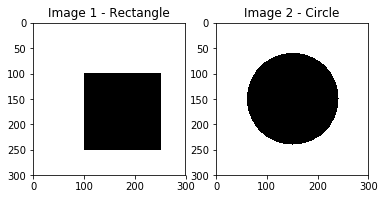

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2)

rect = 255 * np.ones((300, 300), dtype="uint8")
cv2.rectangle(rect, pt1=(100, 100), pt2=(250, 250), color=0, thickness=-1)
ax[0].imshow(rect, cmap='gray')
ax[0].set_title("Image 1 - Rectangle")
 
circle = 255 * np.ones((300, 300), dtype="uint8")
cv2.circle(circle, center=(150, 150), radius=90, color=0, thickness=-1)
ax[1].imshow(circle, cmap='gray')
ax[1].set_title("Image 2 - Circle")
 
plt.show()

### AND Operation: 

    This operation computes bitwise conjunction of the two images or arrays (dst = src1 & src2).
    Calculates the per-element bit-wise conjunction of two arrays or an array and a scalar.
    
   The function **bitwise_and** calculates the per-element bit-wise logical conjunction for:
   
   - Two arrays when src1 and src2 have the same size:
   - An array and a scalar when src2 is constructed from Scalar or has the same number of elements as `src1.channels()`
   - A scalar and an array when src1 is constructed from Scalar or has the same number of elements as `src2.channels()`

    In case of floating-point arrays, their machine-specific bit representations (usually IEEE754-compliant) are used 
    for the operation. In case of multi-channel arrays, each channel is processed independently. In the second and 
    third cases above, the scalar is first converted to the array type. 
    Ref - https://www.harrisgeospatial.com/docs/Bitwise_Operators.html
    
**Parameters:**
   
   - src1 :   first input array or a scalar.
   - src2 :   second input array or a scalar.
   - dst  :   output array that has the same size and type as the input arrays.
   - mask :   optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

Text(0.5, 0.98, 'BITWISE AND OPERATION')

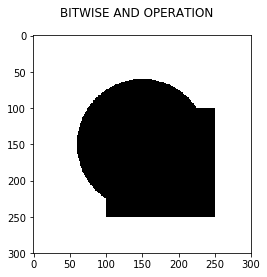

In [38]:
bitwise_AND = cv2.bitwise_and(rect,circle)
plt.imshow(bitwise_AND, cmap='gray')
plt.suptitle("BITWISE AND OPERATION")

Text(0.5, 0.98, 'BITWISE OR OPERATION')

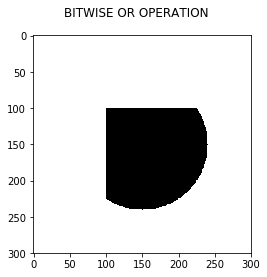

In [39]:
bitwise_OR = cv2.bitwise_or(rect,circle)
plt.imshow(bitwise_OR, cmap='gray')
plt.suptitle("BITWISE OR OPERATION")

Text(0.5, 0.98, 'BITWISE XOR OPERATION')

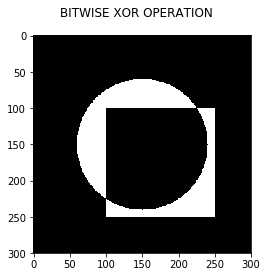

In [40]:
bitwise_XOR = cv2.bitwise_xor(rect, circle)
plt.imshow(bitwise_XOR, cmap='gray')
plt.suptitle("BITWISE XOR OPERATION")
 

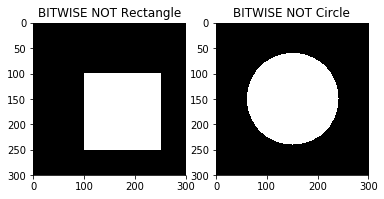

In [56]:
bitwise_NOT_rect = cv2.bitwise_not(rect)
bitwise_NOT_circle = cv2.bitwise_not(circle)

fig, ax = plt.subplots(1,2)

ax[0].imshow(bitwise_NOT_rect, cmap='gray')
ax[0].set_title("BITWISE NOT Rectangle")
 
ax[1].imshow(bitwise_NOT_circle, cmap='gray')
ax[1].set_title("BITWISE NOT Circle")
 
plt.show()